EDA
---

In [181]:
#import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

#display options
pd.options.display.max_rows = 40
%matplotlib inline
plt.style.use('dark_background')

In [182]:
#import data
data_path = '../data/'
train_data_filename = 'Training_DataSet.csv'
test_data_filename = 'Test_Dataset.csv'

traindf = pd.read_csv(data_path + train_data_filename)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [183]:
#look at top of the list
traindf.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [18]:
#look at basic statistics of numeric data
traindf.describe()

,ListingID,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,6.298000e+03,6298.000000,6298.000000,6296.000000,6296.000000,6296.000000,6298.000000,6246.000000
mean,4.318130e+06,4.138346,434.565576,45234.211722,56.143670,26369.364358,2016.792633,32265.053314
std,2.486031e+06,1.188033,1274.257411,20380.478191,68.301329,13036.568712,1.206566,7538.339005
min,3.287000e+03,0.000000,0.000000,1105.000000,0.293102,0.000000,2015.000000,18289.000000
25%,2.178112e+06,4.000000,28.000000,28806.000000,12.998391,16835.000000,2015.000000,26900.000000
50%,4.298122e+06,4.600000,126.000000,46410.000000,33.463484,26181.000000,2017.000000,31455.500000
75%,6.488249e+06,4.800000,401.000000,60126.000000,74.139769,36468.500000,2018.000000,35991.000000
max,8.620012e+06,5.000000,14635.000000,99654.000000,820.684375,83037.000000,2019.000000,89500.000000


---
# Listing ID
---

<AxesSubplot:>

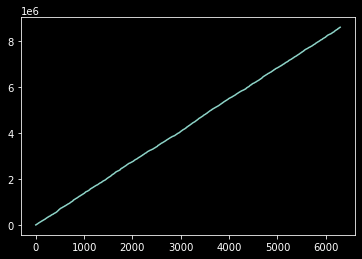

In [26]:
# 'ListingID' monotonically increases, approxmately linearly, with index.
testdf.ListingID.plot()

<AxesSubplot:>

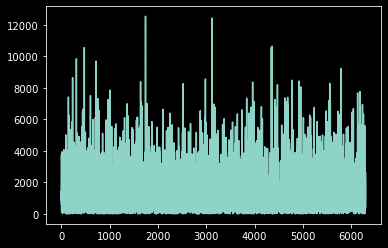

In [21]:
#Increase of subsequent IDs is always positive but variable.
testdf.ListingID.diff().plot()

<AxesSubplot:>

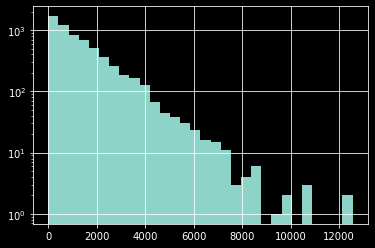

In [24]:
#The distribution of the increase is exponentially decaying with larger skips.
testdf.ListingID.diff().hist(bins = 30, log = True)

# SellerCity
These all appear to be USA cities. Top represented cities largely not from the west coast?

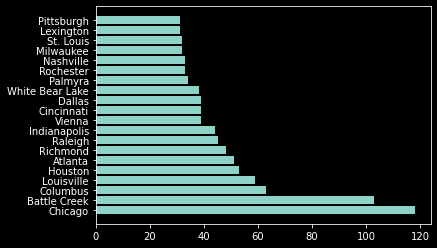

In [51]:
#plot number of instances of sales from the most represented cities
scvaluecounts = traindf.SellerCity.value_counts()[:20];
plt.barh(scvaluecounts.index, scvaluecounts);

In [53]:
#how many cities are represented?
len(traindf.SellerCity.unique())

1318

---
# SellerIsPriv

If private seller. (Is a dealership a non-private seller?)

In [62]:
#Only 14 of the listings are listed as private. This may cause overfitting.
priv

False    6284
True       14
Name: SellerIsPriv, dtype: int64

In [70]:
# What are typical prices of these?
privateprices = traindf.loc[traindf['SellerIsPriv'] == 1, 'Dealer_Listing_Price' ]
privateprices.describe()

count       14.000000
mean     30310.214286
std       6223.299065
min      18699.000000
25%      27112.500000
50%      30700.000000
75%      34375.000000
max      42000.000000
Name: Dealer_Listing_Price, dtype: float64

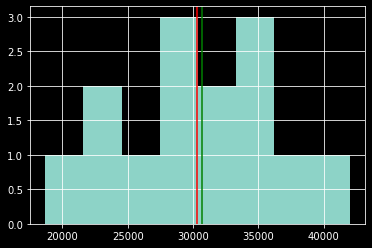

In [94]:
privateprices.hist(bins = 8)
plt.axvline(privateprices.mean(), color = 'red')
plt.axvline(privateprices.describe()['50%'], color = 'green')

In [95]:
#Compare this to the overall prices for the set later.

# SellerListSrc

In [98]:
#only a few different "seller listing source identifiers".
traindf.SellerListSrc.value_counts()

Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64

In [99]:
#two listings are NaN
# These also have SellerZip, VehSellerNotes, and VehTransmission as NaN.
traindf.loc[traindf['SellerListSrc'].isna()]

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
1125,1562581,Richmond,False,NaN,Pearson Chrysler Jeep Dodge RAM,1.0,4,VA,NaN,SUV,...,Jeep,38329.0,Grand Cherokee,Good Deal,NaN,Used,NaN,2017,Limited,26333.0
3855,5306897,Dearborn,False,NaN,Jack Demmer Lincoln,4.8,261,MI,NaN,SUV,...,Jeep,36678.0,Grand Cherokee,Fair Price,NaN,Used,NaN,2015,Limited,23500.0


---
# SellerName

In [104]:
#about 60% of the sellers only show once
len(traindf.SellerName.unique()), len(traindf.SellerName.unique())/len(traindf)

(2452, 0.3893299460146078)

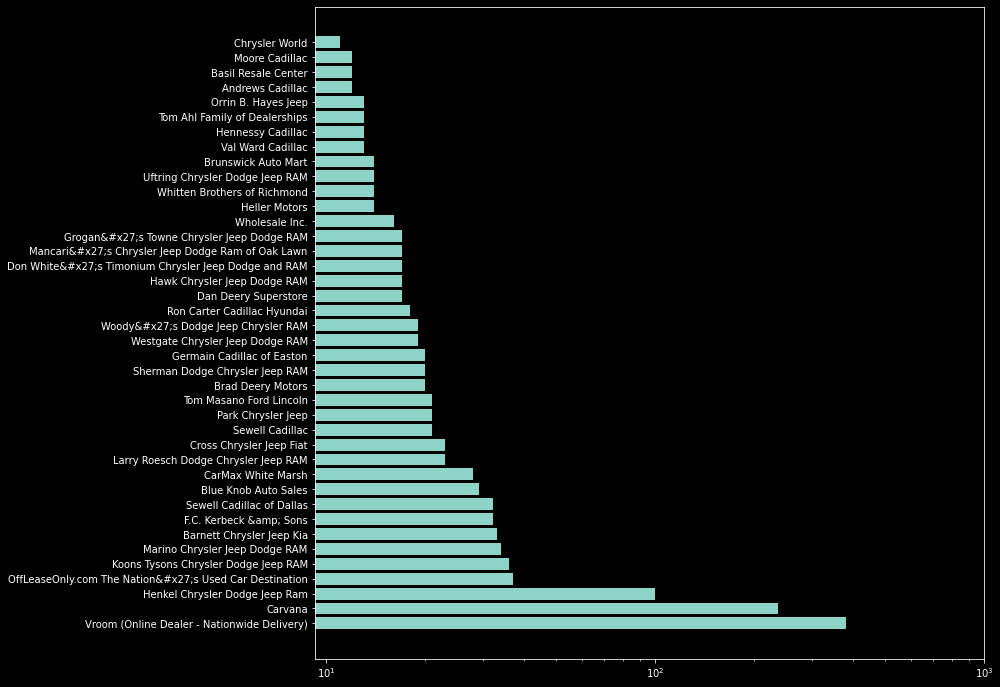

In [130]:
#Look at number of sales of instances from each seller type.
sellernamecounts = traindf.SellerName.value_counts()[:40]
plt.figure(figsize = (12,12))
plt.barh(sellernamecounts.index, sellernamecounts, log = True)
plt.xticks(np.logspace(1,3,3));

---
# SellerRating

In [131]:
traindf.SellerRating.describe()

count    6298.000000
mean        4.138346
std         1.188033
min         0.000000
25%         4.000000
50%         4.600000
75%         4.800000
max         5.000000
Name: SellerRating, dtype: float64

<AxesSubplot:>

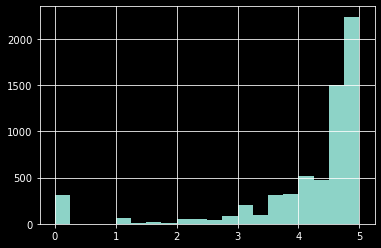

In [139]:
#look at rating distribution
traindf.SellerRating.hist(bins = 20)

Text(0, 0.5, 'sale price')

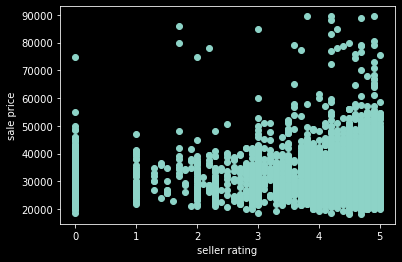

In [143]:
#Seller rating with avg sales price isn't directly correlated
plt.scatter(
    traindf.SellerRating,
    traindf['Dealer_Listing_Price']
)
plt.xlabel('seller rating')
plt.ylabel("sale price")

---
# SellerRevCnt

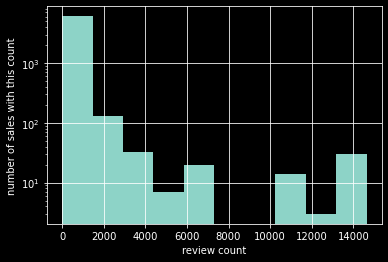

In [150]:
#look at distribution of review counts. these include repeat-counted values from the same seller.
traindf.SellerRevCnt.hist(log = True)
plt.xlabel('review count')
plt.ylabel('number of sales with this count');

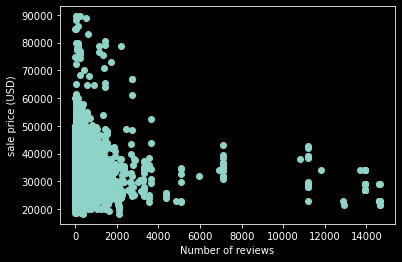

In [155]:
#price with review count
plt.scatter(
    traindf['SellerRevCnt'],
    traindf['Dealer_Listing_Price']
)
plt.xlabel('Number of reviews')
plt.ylabel('sale price (USD)');

---
# SellerState

In [176]:
## this is redone with state names and regions following

#look at all unique seller states and rates
# statevcs = traindf['SellerState'].value_counts()
# plt.figure(figsize = (6,12))
# plt.barh(statevcs.index, statevcs, log = True)

In [177]:
#import region table to look at regional representation
region_filepath = '../us-census-regions-divisions.csv'
regions = pd.read_csv(region_filepath)
regions.set_index('State Code', inplace=True)
#take a look to see it worked
regions.head()

,State,Region,Division
State Code,,,
AK,Alaska,West,Pacific
AL,Alabama,South,East South Central
AR,Arkansas,South,West South Central
AZ,Arizona,West,Mountain
CA,California,West,Pacific


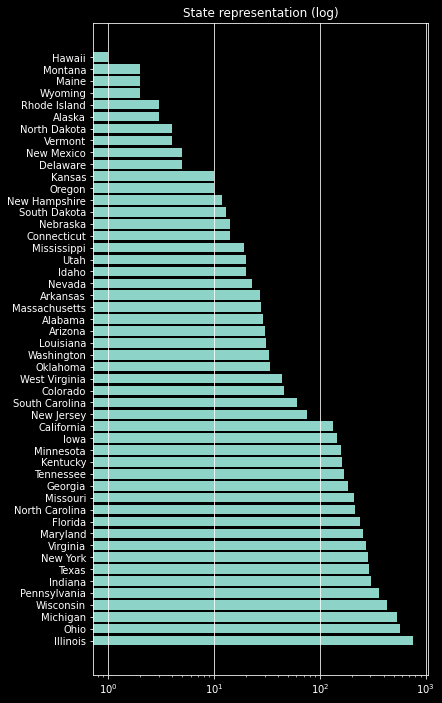

In [188]:
#join regions onto data to see representation of states and view
regiondata = traindf.join(regions, on = 'SellerState')[['SellerState', 'State', 'Region', 'Division']]
statesvcs = regiondata['State'].value_counts()
plt.figure(figsize=(6,12))
plt.barh(statesvcs.index, statesvcs, log = True)
plt.title("State representation (log)");
plt.grid(b = True, axis ='x')

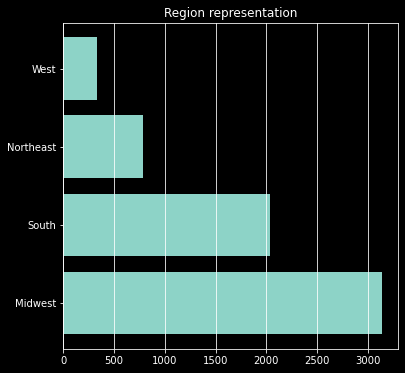

In [191]:
# look at region representations
regvcs = regiondata['Region'].value_counts()
plt.figure(figsize = (6,6))
plt.barh(regvcs.index, regvcs, log = False)
plt.title('Region representation')
plt.grid(b = True, axis = 'x')

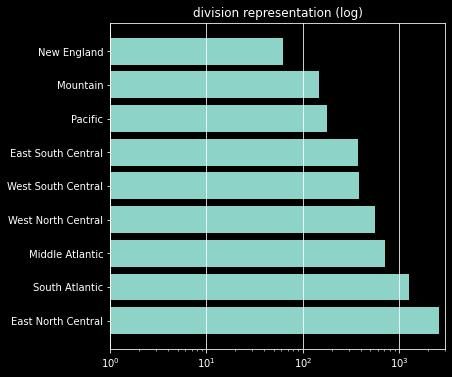

In [200]:
divvcs = regiondata['Division'].value_counts()
plt.figure(figsize = (6,6))
plt.barh(divvcs.index, divvcs, log = True)
plt.title('division representation (log)')
plt.grid(b = True, axis = 'x')
plt.xlim(1,3000);

---
# SellerZip

Most of the listings do not have a zip --- this may be influenced by online sales.

Zip is highly related to seller and other location values.

In [206]:
#look at common zips
traindf['SellerZip'].value_counts().head(20)

49037.0    101
55110.0     40
22182.0     39
60641.0     35
75209.0     33
60606.0     33
8065.0      32
30303.0     31
20817.0     29
16635.0     29
21162.0     28
44118.0     27
60126.0     25
60603.0     24
55337.0     23
40218.0     23
43219.0     23
60453.0     22
60010.0     22
77079.0     22
Name: SellerZip, dtype: int64

In [202]:
traindf['SellerName'].value_counts()

Vroom (Online Dealer - Nationwide Delivery)                381
Carvana                                                    236
Henkel Chrysler Dodge Jeep Ram                             100
OffLeaseOnly.com The Nation&#x27;s Used Car Destination     37
Koons Tysons Chrysler Dodge Jeep RAM                        36
                                                          ... 
Liberty Buick GMC                                            1
Ray Skillman KIA Mitsubishi                                  1
West Herr Toyota of Orchard Park                             1
Raymond Chevrolet-Kia                                        1
Foster Chevrolet Cadillac                                    1
Name: SellerName, Length: 2452, dtype: int64

---
# VehBodystyle

Every listing is SUV body style. This is a useless column.

In [211]:
traindf['VehBodystyle'].value_counts()

SUV    6298
Name: VehBodystyle, dtype: int64

---
# VehCertified

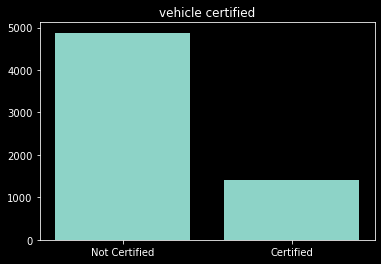

In [218]:
certvcs = traindf['VehCertified'].value_counts()
plt.bar(['Not Certified', 'Certified'], certvcs)
plt.title("vehicle certified");

---
# VehColorExt

There are a lot of exterior colors. It will be good to reduce these to subproperties like:

- general color
- descriptive words like metallic, clearcoat, crystal
- extra sexy words like diamond, maximum, sangria (?), Stellar, Radiant.
    - find out which extra descriptive words are true descriptors or simply marketing.

It also appears that roof camera information is included in some of these.

In [222]:
def value_count_barplot(series, h = True, log = False, figsize = (12,6)):
    plt.figure(figsize = figsize)
    this_value_counts = series.value_counts()
    if h:
        plot = plt.barh
    else:
        plot = plt.bar
    plot(this_value_counts.index, this_value_counts, log = log)

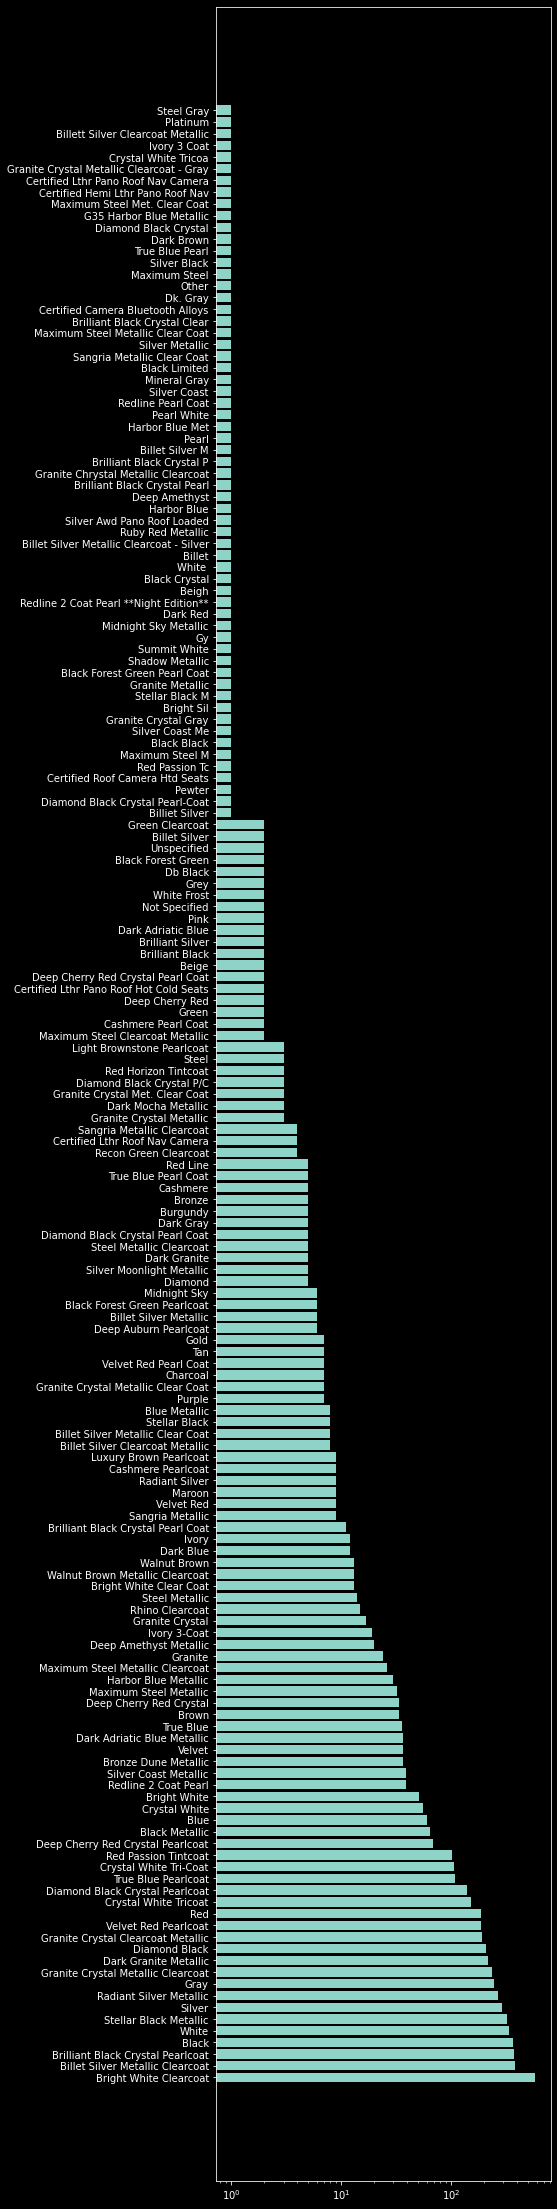

In [227]:
colorevcs = traindf['VehColorExt'].value_counts()
value_count_barplot(traindf['VehColorExt'], log = True, figsize = (6,40))

---

In [27]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [ ]:
a